In [248]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


Data Preprocessing
Loading dataset

In [249]:
profiles = pd.read_csv('data/profiles.csv')
animes = pd.read_csv('data/animes.csv')
reviews = pd.read_csv('data/reviews.csv')

In [250]:
# Checking the columns of the dataset
print("Profiles columns:", profiles.columns)
print("Animes columns:", animes.columns)
print("Reviews columns:", reviews.columns)

Profiles columns: Index(['profile', 'gender', 'birthday', 'favorites_anime', 'link'], dtype='object')
Animes columns: Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')
Reviews columns: Index(['uid', 'profile', 'anime_uid', 'text', 'score', 'scores', 'link'], dtype='object')


In [251]:
# Merging datasets:
try:
    merged_data = pd.merge(animes, reviews, on='uid', how='inner')
    merged_data = pd.merge(merged_data, profiles, on='profile', how='inner')

    print("Merge successful!")
    print("Merged dataset:")
    print(merged_data.head())
except KeyError as e:
    print("KeyError:", e)

Merge successful!
Merged dataset:
     uid                    title  \
0  23273  Shigatsu wa Kimi no Uso   
1  23273  Shigatsu wa Kimi no Uso   
2  23273  Shigatsu wa Kimi no Uso   
3  23273  Shigatsu wa Kimi no Uso   
4  23273  Shigatsu wa Kimi no Uso   

                                            synopsis  \
0  Music accompanies the path of the human metron...   
1  Music accompanies the path of the human metron...   
2  Music accompanies the path of the human metron...   
3  Music accompanies the path of the human metron...   
4  Music accompanies the path of the human metron...   

                                               genre  \
0  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
1  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
2  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
3  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   
4  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   

                          aired  episodes  members  popularity  ranke

Cleaning the merged dataset: 

Checking for missing values in the merged DataFrame

In [252]:
        
rows, columns = merged_data.shape
print("Number of rows:", rows)
print("Number of columns:", columns)
print(merged_data.columns)

Number of rows: 31738
Number of columns: 22
Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score_x', 'img_url', 'link_x', 'profile',
       'anime_uid', 'text', 'score_y', 'scores', 'link_y', 'gender',
       'birthday', 'favorites_anime', 'link'],
      dtype='object')


Droping unnecessary columns from dataframe



In [253]:
columns_to_drop = ['favorites_anime', 'link',
                   'title', 'synopsis', 'aired', 'episodes',  
                    'score', 'img_url', 
                   'text', 'score', 'scores', 'link_y', 'link_x', 
                   'uid', 'anime_uid', 'profile'
                  ]

merged_data.drop(columns=columns_to_drop, inplace=True, errors='ignore') 
print(merged_data.head())

                                               genre  members  popularity  \
0  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   995473          28   
1  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   995473          28   
2  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   995473          28   
3  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   995473          28   
4  ['Drama', 'Music', 'Romance', 'School', 'Shoun...   995473          28   

   ranked  score_x  score_y  gender birthday  
0    24.0     8.83       10  Female    Jan 4  
1    24.0     8.83       10  Female    Jan 4  
2    24.0     8.83       10  Female    Jan 4  
3    24.0     8.83       10  Female    Jan 4  
4    24.0     8.83       10  Female    Jan 4  


In [254]:
missing_values = merged_data.isnull().sum()
print(missing_values)

genre            0
members          0
popularity       0
ranked        4789
score_x        661
score_y          0
gender        5153
birthday      8038
dtype: int64


In [255]:
merged_data.nunique()
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31738 entries, 0 to 31737
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genre       31738 non-null  object 
 1   members     31738 non-null  int64  
 2   popularity  31738 non-null  int64  
 3   ranked      26949 non-null  float64
 4   score_x     31077 non-null  float64
 5   score_y     31738 non-null  int64  
 6   gender      26585 non-null  object 
 7   birthday    23700 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [256]:
# Cleaning genre column
# Replacing inconsistent/ duplicate genre values
merged_data['genre'] = merged_data['genre'].str.replace("'", "").str.strip()

# Removing unwanted characters from the column names
merged_data['genre'] = merged_data['genre'].str.replace(r'[\[\]]', '', regex=True)      
merged_data['genre'] = merged_data['genre'].str.replace(r'\'', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'\"', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'\\', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'/', ',', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r' ', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'&', ',', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r' ', '', regex=True)     



In [257]:

print(merged_data['genre'])

0             Drama,Music,Romance,School,Shounen
1             Drama,Music,Romance,School,Shounen
2             Drama,Music,Romance,School,Shounen
3             Drama,Music,Romance,School,Shounen
4             Drama,Music,Romance,School,Shounen
                          ...                   
31733            SliceofLife,Comedy,Supernatural
31734            SliceofLife,Comedy,Supernatural
31735            SliceofLife,Comedy,Supernatural
31736    Comedy,Drama,Romance,School,SliceofLife
31737    Comedy,Drama,Romance,School,SliceofLife
Name: genre, Length: 31738, dtype: object


In [258]:

# Converting 'birthday' column to datetime data type and handling errors
merged_data['birthday'] = pd.to_datetime(merged_data['birthday'], format='%b %d, %Y', errors='coerce')
print(merged_data['birthday'])



0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
31733          NaT
31734          NaT
31735          NaT
31736   1996-01-10
31737   1996-01-10
Name: birthday, Length: 31738, dtype: datetime64[ns]


In [259]:
# Calculating the age based on current date

current_date = datetime.now()
merged_data['age'] = (current_date - merged_data['birthday']) // pd.Timedelta(days=365)
print(merged_data)

                                         genre  members  popularity  ranked  \
0           Drama,Music,Romance,School,Shounen   995473          28    24.0   
1           Drama,Music,Romance,School,Shounen   995473          28    24.0   
2           Drama,Music,Romance,School,Shounen   995473          28    24.0   
3           Drama,Music,Romance,School,Shounen   995473          28    24.0   
4           Drama,Music,Romance,School,Shounen   995473          28    24.0   
...                                        ...      ...         ...     ...   
31733          SliceofLife,Comedy,Supernatural    61459        1648  1727.0   
31734          SliceofLife,Comedy,Supernatural    61459        1648  1727.0   
31735          SliceofLife,Comedy,Supernatural    61459        1648  1727.0   
31736  Comedy,Drama,Romance,School,SliceofLife   128400         883  1533.0   
31737  Comedy,Drama,Romance,School,SliceofLife   128400         883  1533.0   

       score_x  score_y  gender   birthday   age  


In [260]:
# Droping birthday column from merged_data
merged_data.drop("birthday", axis=1, inplace=True)

In [261]:
# Removing rows where age couldn't be calculated
merged_data.dropna(subset=['age'], inplace=True)  


In [262]:
#Calculating the mean age
mean_age = merged_data['age'].mean()
print("Mean Age:", mean_age)

Mean Age: 35.00311416651977


In [263]:
# Filling the missing values in the 'age' column with the mean age
merged_data['age'].fillna(mean_age, inplace=True)


In [264]:
# Checking for and handling any outliers or unrealistic age values 
#  Assuming ages above 100 or below 10 are unrealistic for your dataset
merged_data = merged_data[(merged_data['age'] <= 100) & (merged_data['age'] >= 10)]

In [265]:
# Calculating the mode of gender
mode_gender = merged_data['gender'].mode()[0]
print(mode_gender)

Male


In [266]:

# Filling missing values in the 'gender' columnn with mode gender
merged_data['gender'].fillna(mode_gender, inplace=True)
merged_data.describe()

,members,popularity,ranked,score_x,score_y,age
count,1.700600e+04,17006.000000,14221.000000,16619.000000,17006.000000,17006.000000
mean,3.650469e+04,7283.454545,6509.786443,6.495087,8.011231,35.023580
std,1.090411e+05,4547.777875,4281.325774,0.979185,1.984901,6.975951
min,3.600000e+01,1.000000,9.000000,2.070000,1.000000,11.000000
25%,5.040000e+02,3571.000000,2687.000000,5.840000,7.000000,31.000000
50%,3.192500e+03,6868.500000,6456.000000,6.460000,9.000000,34.000000
75%,1.598800e+04,11005.000000,9992.000000,7.180000,10.000000,37.000000
max,1.871043e+06,16334.000000,14675.000000,9.020000,10.000000,94.000000


In [267]:
# Imputing 'ranked' with max rank + 1
max_rank = merged_data['ranked'].max()
merged_data['ranked'].fillna(value=max_rank + 1, inplace=True)

# Checking the distribution of 'score_x' to decide on mean or median
score_x_median = merged_data['score_x'].median()
merged_data['score_x'].fillna(value=score_x_median, inplace=True)


In [268]:
missing_values = merged_data.isnull().sum()
print(missing_values)

genre         0
members       0
popularity    0
ranked        0
score_x       0
score_y       0
gender        0
age           0
dtype: int64


In [269]:
print(merged_data)

                                              genre  members  popularity  \
16           Sci-Fi,Adventure,Mystery,Drama,Fantasy   581663          98   
17           Sci-Fi,Adventure,Mystery,Drama,Fantasy   581663          98   
18           Sci-Fi,Adventure,Mystery,Drama,Fantasy   581663          98   
19           Sci-Fi,Adventure,Mystery,Drama,Fantasy   581663          98   
20                                            Music      181       13735   
...                                             ...      ...         ...   
31727                           Action,Sci-Fi,Mecha    29241        2613   
31728                           Action,Sci-Fi,Mecha    29241        2613   
31731  Action,Comedy,SuperPower,MartialArts,Shounen    34155        2382   
31736       Comedy,Drama,Romance,School,SliceofLife   128400         883   
31737       Comedy,Drama,Romance,School,SliceofLife   128400         883   

        ranked  score_x  score_y  gender   age  
16        23.0     8.83       10  Fema

In [270]:

# Creating a new feature for the count of genres a user likes
merged_data['num_genres'] = merged_data['genre'].apply(lambda x: len(x.split(',')))

# Checking the first few rows to verify
print(merged_data[['genre', 'num_genres']].tail())


                                              genre  num_genres
31727                           Action,Sci-Fi,Mecha           3
31728                           Action,Sci-Fi,Mecha           3
31731  Action,Comedy,SuperPower,MartialArts,Shounen           5
31736       Comedy,Drama,Romance,School,SliceofLife           5
31737       Comedy,Drama,Romance,School,SliceofLife           5


In [271]:
# Adjust splitting and ensure genres are stripped of any leading/trailing whitespace
merged_data['genre'] = merged_data['genre'].apply(lambda x: [i.strip() for i in x.split(',')])


In [292]:

print(merged_data['genre'].head())


16    [Sci-Fi, Adventure, Mystery, Drama, Fantasy]
17    [Sci-Fi, Adventure, Mystery, Drama, Fantasy]
18    [Sci-Fi, Adventure, Mystery, Drama, Fantasy]
19    [Sci-Fi, Adventure, Mystery, Drama, Fantasy]
20                                         [Music]
Name: genre, dtype: object


In [293]:
# Preparing the data for the Apriori algorithm with TransactionEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(merged_data['genre']).transform(merged_data['genre'])
df_te = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori algorithm      
frequent_genres = apriori(df_te, min_support=0.01, use_colnames=True)
frequent_genres = frequent_genres[frequent_genres['itemsets'].apply(lambda x: len(x)) >= 3]

print(frequent_genres.sort_values(by='support', ascending=False).head())


      support                      itemsets
164  0.032459       (Sci-Fi, Mecha, Action)
168  0.031989  (Fantasy, Adventure, Comedy)
153  0.031283  (Fantasy, Adventure, Action)
158  0.026990     (Shounen, Action, Comedy)
151  0.026520   (Adventure, Action, Comedy)


In [298]:
#Defining the top combinations of genres
top_combinations = [
    ['Sci-Fi', 'Mecha', 'Action'],
    ['Fantasy', 'Adventure', 'Comedy'],
    ['Fantasy', 'Adventure', 'Action'],
    ['Shounen', 'Action', 'Comedy'],
    ['Adventure', 'Action', 'Comedy']
]


In [299]:

# Defining a function to check if the anime contains all genres in the combination
def contains_all_genres(anime_genres, genre_combination):
    return set(genre_combination).issubset(set(anime_genres))


In [301]:
# Creating binary features for each combination
for i, combination in enumerate(top_combinations, start=1):
    column_name = f'combo_{i}'
    merged_data[column_name] = merged_data['genre'].apply(lambda x: contains_all_genres(x, combination)).astype(int)

In [311]:
# Displaying the DataFrame to verify the new columns
print(merged_data[['genre', 'combo_1', 'combo_2', 'combo_3', 'combo_4', 'combo_5']])



                                                   genre  combo_1  combo_2  \
16          [Sci-Fi, Adventure, Mystery, Drama, Fantasy]        0        0   
17          [Sci-Fi, Adventure, Mystery, Drama, Fantasy]        0        0   
18          [Sci-Fi, Adventure, Mystery, Drama, Fantasy]        0        0   
19          [Sci-Fi, Adventure, Mystery, Drama, Fantasy]        0        0   
20                                               [Music]        0        0   
...                                                  ...      ...      ...   
31727                            [Action, Sci-Fi, Mecha]        1        0   
31728                            [Action, Sci-Fi, Mecha]        1        0   
31731  [Action, Comedy, SuperPower, MartialArts, Shou...        0        0   
31736      [Comedy, Drama, Romance, School, SliceofLife]        0        0   
31737      [Comedy, Drama, Romance, School, SliceofLife]        0        0   

       combo_3  combo_4  combo_5  
16           0        0     

In [306]:
print(merged_data)

                                                   genre  members  popularity  \
16          [Sci-Fi, Adventure, Mystery, Drama, Fantasy]   581663          98   
17          [Sci-Fi, Adventure, Mystery, Drama, Fantasy]   581663          98   
18          [Sci-Fi, Adventure, Mystery, Drama, Fantasy]   581663          98   
19          [Sci-Fi, Adventure, Mystery, Drama, Fantasy]   581663          98   
20                                               [Music]      181       13735   
...                                                  ...      ...         ...   
31727                            [Action, Sci-Fi, Mecha]    29241        2613   
31728                            [Action, Sci-Fi, Mecha]    29241        2613   
31731  [Action, Comedy, SuperPower, MartialArts, Shou...    34155        2382   
31736      [Comedy, Drama, Romance, School, SliceofLife]   128400         883   
31737      [Comedy, Drama, Romance, School, SliceofLife]   128400         883   

        ranked  score_x  sc

In [317]:
# Cleaning genre column

merged_data['genre'] = merged_data['genre'].astype(str)

merged_data['genre'] = merged_data['genre'].str.replace("'", "").str.strip()
merged_data['genre'] = merged_data['genre'].str.replace(r'[\[\]]', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'\'', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'\"', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'\\', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'/', ',', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r' ', '', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r'&', ',', regex=True)
merged_data['genre'] = merged_data['genre'].str.replace(r' ', '', regex=True)
merged_data['genre']



16             Sci-Fi,Adventure,Mystery,Drama,Fantasy
17             Sci-Fi,Adventure,Mystery,Drama,Fantasy
18             Sci-Fi,Adventure,Mystery,Drama,Fantasy
19             Sci-Fi,Adventure,Mystery,Drama,Fantasy
20                                              Music
                             ...                     
31727                             Action,Sci-Fi,Mecha
31728                             Action,Sci-Fi,Mecha
31731    Action,Comedy,SuperPower,MartialArts,Shounen
31736         Comedy,Drama,Romance,School,SliceofLife
31737         Comedy,Drama,Romance,School,SliceofLife
Name: genre, Length: 17006, dtype: object

In [318]:
# Spliting genres into individual columns
genre_dummies = merged_data['genre'].str.get_dummies(sep=',')
print(genre_dummies)



       Action  Adventure  Cars  Comedy  Dementia  Demons  Drama  Ecchi  \
16          0          1     0       0         0       0      1      0   
17          0          1     0       0         0       0      1      0   
18          0          1     0       0         0       0      1      0   
19          0          1     0       0         0       0      1      0   
20          0          0     0       0         0       0      0      0   
...       ...        ...   ...     ...       ...     ...    ...    ...   
31727       1          0     0       0         0       0      0      0   
31728       1          0     0       0         0       0      0      0   
31731       1          0     0       1         0       0      0      0   
31736       0          0     0       1         0       0      1      0   
31737       0          0     0       1         0       0      1      0   

       Fantasy  Game  ...  ShounenAi  SliceofLife  Space  Sports  SuperPower  \
16           1     0  ...      

In [320]:
# Converting column names to lowercase
genre_dummies.columns = genre_dummies.columns.str.lower()

In [321]:

# Cleaning whitespaces in genres
genre_dummies.columns = genre_dummies.columns.str.strip()




In [322]:
# Removing duplicate columns
genre_dummies = genre_dummies.loc[:, ~genre_dummies.columns.duplicated()]

In [323]:
#Checking the unique genre column names
unique_genres = genre_dummies.columns.unique()
print(unique_genres)

Index(['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama',
       'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror',
       'josei', 'kids', 'magic', 'martialarts', 'mecha', 'military', 'music',
       'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai',
       'school', 'sci-fi', 'seinen', 'shoujo', 'shoujoai', 'shounen',
       'shounenai', 'sliceoflife', 'space', 'sports', 'superpower',
       'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype='object')


In [325]:
# Sorting columns alphabetically
genre_dummies = genre_dummies.reindex(sorted(genre_dummies.columns), axis=1)



In [329]:

# Removing unwanted characters from the column names
genre_dummies.columns = genre_dummies.columns.str.replace('[\[\]]', '', regex=True)

# Fixing any potential duplicates due to this cleanup (e.g., "adventure " and "adventure")
genre_dummies = genre_dummies.groupby(genre_dummies.columns, axis=1).sum()


<>:2: DeprecationWarning: invalid escape sequence '\['
<>:2: DeprecationWarning: invalid escape sequence '\['
/var/folders/6p/g6wy8vwd7ms9_r3fsw_4dgxh0000gn/T/ipykernel_5361/1288177869.py:2: DeprecationWarning: invalid escape sequence '\['
  genre_dummies.columns = genre_dummies.columns.str.replace('[\[\]]', '', regex=True)


In [330]:
# Droping any unnamed or empty columns if they exist
genre_dummies= genre_dummies.loc[:, ~genre_dummies.columns.str.contains('^Unnamed')]

# Removing columns with empty names
genre_dummies = genre_dummies.loc[:, ~genre_dummies.columns.str.match('^$')]  


In [331]:

# Displaying the cleaned genre_dummies DataFrame
print(genre_dummies)
print(genre_dummies.columns)

       action  adventure  cars  comedy  dementia  demons  drama  ecchi  \
16          0          1     0       0         0       0      1      0   
17          0          1     0       0         0       0      1      0   
18          0          1     0       0         0       0      1      0   
19          0          1     0       0         0       0      1      0   
20          0          0     0       0         0       0      0      0   
...       ...        ...   ...     ...       ...     ...    ...    ...   
31727       1          0     0       0         0       0      0      0   
31728       1          0     0       0         0       0      0      0   
31731       1          0     0       1         0       0      0      0   
31736       0          0     0       1         0       0      1      0   
31737       0          0     0       1         0       0      1      0   

       fantasy  game  ...  shounenai  sliceoflife  space  sports  \
16           1     0  ...          0       

In [387]:
genre_dummies

,action,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,game,...,shounenai,sliceoflife,space,sports,supernatural,superpower,thriller,vampire,yaoi,yuri
16,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31727,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31728,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31731,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31736,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [332]:
# Creating a list of genre columns
genres = genre_dummies.columns

# Concatenating the genre columns with the existing dataframe
df = pd.concat([merged_data, genre_dummies], axis=1)

# Displaying the merged dataframe
print(df)


                                              genre  members  popularity  \
16           Sci-Fi,Adventure,Mystery,Drama,Fantasy   581663          98   
17           Sci-Fi,Adventure,Mystery,Drama,Fantasy   581663          98   
18           Sci-Fi,Adventure,Mystery,Drama,Fantasy   581663          98   
19           Sci-Fi,Adventure,Mystery,Drama,Fantasy   581663          98   
20                                            Music      181       13735   
...                                             ...      ...         ...   
31727                           Action,Sci-Fi,Mecha    29241        2613   
31728                           Action,Sci-Fi,Mecha    29241        2613   
31731  Action,Comedy,SuperPower,MartialArts,Shounen    34155        2382   
31736       Comedy,Drama,Romance,School,SliceofLife   128400         883   
31737       Comedy,Drama,Romance,School,SliceofLife   128400         883   

        ranked  score_x  score_y  gender   age  num_genres  combo_1  ...  \
16        2

In [333]:
# Extracting age column from merged_data
age_column = df['age']
print(age_column)

16       27.0
17       27.0
18       27.0
19       27.0
20       27.0
         ... 
31727    34.0
31728    34.0
31731    32.0
31736    28.0
31737    28.0
Name: age, Length: 17006, dtype: float64


In [337]:
#Droping the genre and column from the dataframe
df.drop('genre', axis=1, inplace=True)

In [348]:
#Encoding the gender column
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the "gender" column
df['gender'] = encoder.fit_transform(df['gender'])


In [398]:
df.drop('gender_encoded', axis=1, inplace=True)

In [399]:
df.columns

Index(['members', 'popularity', 'ranked', 'score_x', 'score_y', 'gender',
       'age', 'num_genres', 'combo_1', 'combo_2', 'combo_3', 'combo_4',
       'combo_5', 'action', 'adventure', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai',
       'historical', 'horror', 'josei', 'kids', 'magic', 'martialarts',
       'mecha', 'military', 'music', 'mystery', 'parody', 'police',
       'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen',
       'shoujo', 'shoujoai', 'shounen', 'shounenai', 'sliceoflife', 'space',
       'sports', 'supernatural', 'superpower', 'thriller', 'vampire', 'yaoi',
       'yuri'],
      dtype='object')

In [ ]:
genres = df.columns

Data Visualization

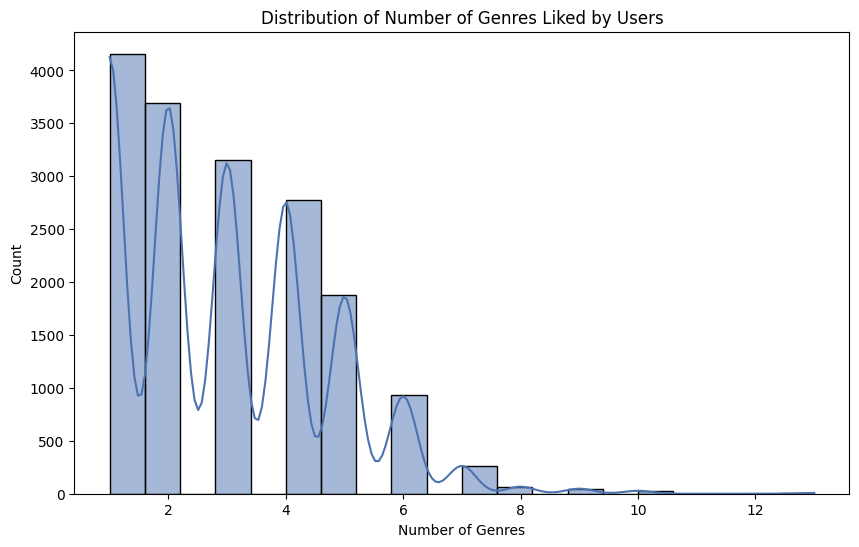

In [380]:
# Visualization 1: Genre Count Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_genres', bins=20, kde=True)
plt.title('Distribution of Number of Genres Liked by Users')
plt.xlabel('Number of Genres')
plt.ylabel('Count')
plt.show()

/var/folders/6p/g6wy8vwd7ms9_r3fsw_4dgxh0000gn/T/ipykernel_5361/737202370.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_combos, x='frequency', y='genre_combo', palette='viridis')


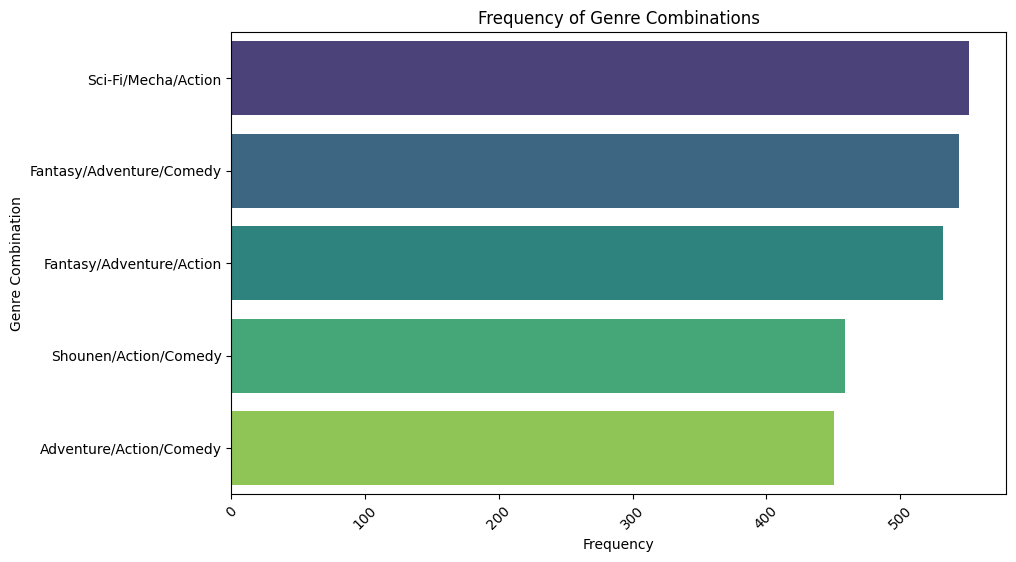

In [391]:
#Visualization 2: Most Frequent Genre Combinations

data = {
    'genre_combo': ['combo_1', 'combo_2', 'combo_3', 'combo_4', 'combo_5'],
    'frequency': [
        df['combo_1'].sum(), 
        df['combo_2'].sum(),
        df['combo_3'].sum(),
        df['combo_4'].sum(),
        df['combo_5'].sum()
    ]
}
df_combos = pd.DataFrame(data)

# Mapping combo identifiers to actual genre names
combo_names = {
    'combo_1': 'Sci-Fi/Mecha/Action',
    'combo_2': 'Fantasy/Adventure/Comedy',
    'combo_3': 'Fantasy/Adventure/Action',
    'combo_4': 'Shounen/Action/Comedy',
    'combo_5': 'Adventure/Action/Comedy'  
}
df_combos['genre_combo'] = df_combos['genre_combo'].map(combo_names)

# Sorting by frequency after mapping
df_combos = df_combos.sort_values('frequency', ascending=False)

# Plotting barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combos, x='frequency', y='genre_combo', palette='viridis')
plt.title('Frequency of Genre Combinations')
plt.xlabel('Frequency')
plt.ylabel('Genre Combination')
plt.xticks(rotation=45)
plt.show()


/var/folders/6p/g6wy8vwd7ms9_r3fsw_4dgxh0000gn/T/ipykernel_5361/3296562463.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


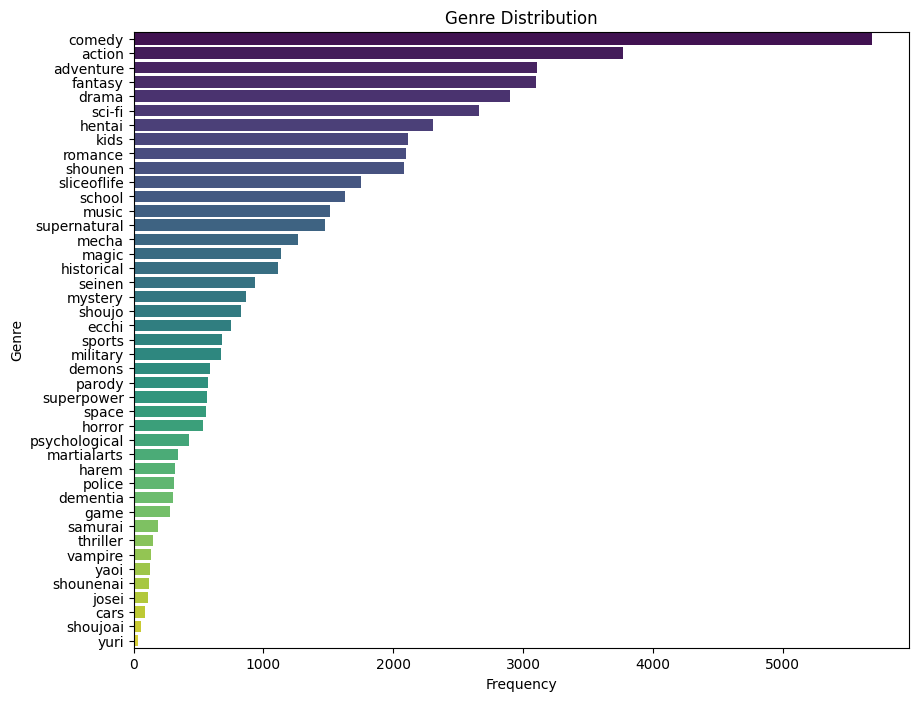

In [418]:
#Visualization 3: Genre Distribution

# Summing up each genre column to get the total count for each genre
genre_counts = df.loc[:, 'action':'yuri'].sum().sort_values(ascending=False)

# Plotting the genre distribution
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()


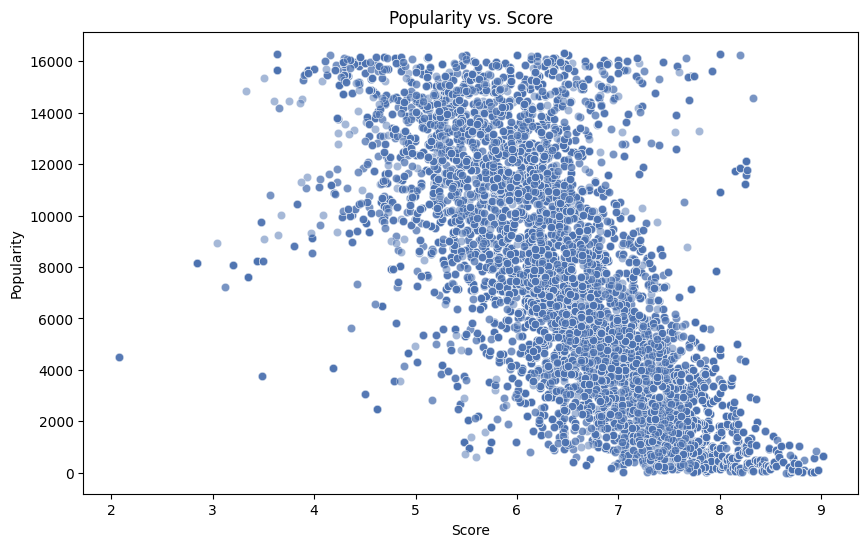

In [383]:
# Visualization 4: Popularity vs. Score

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='score_x', y='popularity', alpha=0.5)
plt.title('Popularity vs. Score')
plt.xlabel('Score')
plt.ylabel('Popularity')
plt.show()

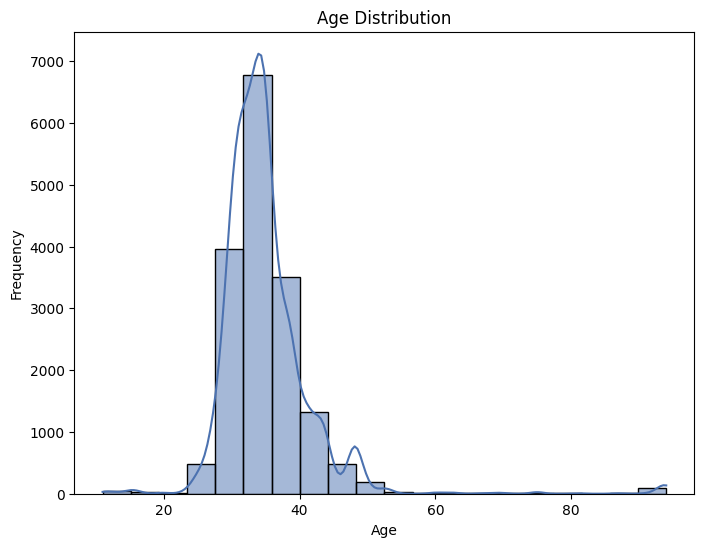

In [392]:
# Visualization 5: Age Distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [407]:
df

,members,popularity,ranked,score_x,score_y,gender,age,num_genres,combo_1,combo_2,...,shounenai,sliceoflife,space,sports,supernatural,superpower,thriller,vampire,yaoi,yuri
16,581663,98,23.0,8.83,10,0,27.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
17,581663,98,23.0,8.83,10,0,27.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
18,581663,98,23.0,8.83,10,0,27.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
19,581663,98,23.0,8.83,10,0,27.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
20,181,13735,10528.0,5.23,7,0,27.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31727,29241,2613,2277.0,7.36,2,0,34.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
31728,29241,2613,2277.0,7.36,2,0,34.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
31731,34155,2382,1728.0,7.50,8,1,32.0,5,0,0,...,0,0,0,0,0,1,0,0,0,0
31736,128400,883,1533.0,7.56,10,0,28.0,5,0,0,...,0,1,0,0,0,0,0,0,0,0


Model Building

Predicting AGE


In [411]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['age'], test_size=0.2, random_state=42)

# Create an instance of the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Absolute Error: 0.6414756025867138
Mean Squared Error: 4.388556613756614
R2 Score: 0.9017760355031188


Predicting GENDER

In [412]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Splitting the data into features and target variable

X = df.drop('gender', axis=1)  
y = df['gender']  
X
y

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choosing a model
model = RandomForestClassifier()

# Training the model
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1015
           1       0.97      0.99      0.98      2352
           2       1.00      1.00      1.00        35

    accuracy                           0.98      3402
   macro avg       0.99      0.98      0.98      3402
weighted avg       0.98      0.98      0.98      3402



In [413]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the StratifiedKFold object
stratified_cv = StratifiedKFold(n_splits=2)

# Create the GridSearchCV object with Stratified Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=stratified_cv)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9424433990002941


Predicting GENRES

In [400]:

from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

feature_columns = ['members', 'popularity', 'ranked', 'score_x', 'score_y', 'gender',
                   'age', 'num_genres', 'combo_1', 'combo_2', 'combo_3', 'combo_4',
                   'combo_5']
genre_columns = ['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama',
                 'ecchi', 'fantasy', 'game', 'harem', 'hentai', 'historical', 'horror',
                 'josei', 'kids', 'magic', 'martialarts', 'mecha', 'military', 'music',
                 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai',
                 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujoai', 'shounen', 
                 'shounenai', 'sliceoflife', 'space', 'sports', 'supernatural', 
                 'superpower', 'thriller', 'vampire', 'yaoi', 'yuri']  # Genre columns

# Separating features and target variables
X = df[feature_columns]
y = df[genre_columns]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the multi-output classifier
forest = RandomForestClassifier(random_state=42)
model = MultiOutputClassifier(forest, n_jobs=-1)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))



Accuracy: 0.9400352733686067


In [401]:
from sklearn.metrics import classification_report

# Converting y_test and y_pred to boolean arrays 
y_test_bool = y_test.astype(bool)
y_pred_bool = y_pred.astype(bool)

# Generating classification report
report = classification_report(y_test_bool, y_pred_bool, target_names=genre_columns)

print(report)


               precision    recall  f1-score   support

       action       0.98      0.96      0.97       772
    adventure       1.00      0.98      0.99       597
         cars       1.00      0.80      0.89        20
       comedy       0.99      0.95      0.97      1113
     dementia       0.98      0.86      0.92        71
       demons       1.00      0.95      0.98       109
        drama       0.99      0.94      0.96       582
        ecchi       0.99      0.91      0.95       144
      fantasy       1.00      0.96      0.98       617
         game       0.93      0.95      0.94        60
        harem       1.00      0.87      0.93        61
       hentai       1.00      1.00      1.00       458
   historical       0.98      0.96      0.97       208
       horror       1.00      0.91      0.95       107
        josei       1.00      1.00      1.00        21
         kids       0.98      0.95      0.96       444
        magic       1.00      0.95      0.97       220
  martial

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _

In [403]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

# Defining model
model = MultiOutputClassifier(RandomForestClassifier(random_state=42), n_jobs=-1)

# Setting up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)


# Defining scorers
scoring = {
    'precision': make_scorer(precision_score, average='samples', zero_division=0),
    'recall': make_scorer(recall_score, average='samples', zero_division=0),
    'f1': make_scorer(f1_score, average='samples', zero_division=0)
}

# Runing cross-validation
cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring)

# Printing the average scores
print(f"Precision: {np.mean(cv_results['test_precision'])}")
print(f"Recall: {np.mean(cv_results['test_recall'])}")
print(f"F1: {np.mean(cv_results['test_f1'])}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Precision: 0.9540655959737494
Recall: 0.9457598121450257
F1: 0.9481311865758395
